The local minimum occurs at -2.9999286376153647
Number of iterations: 50


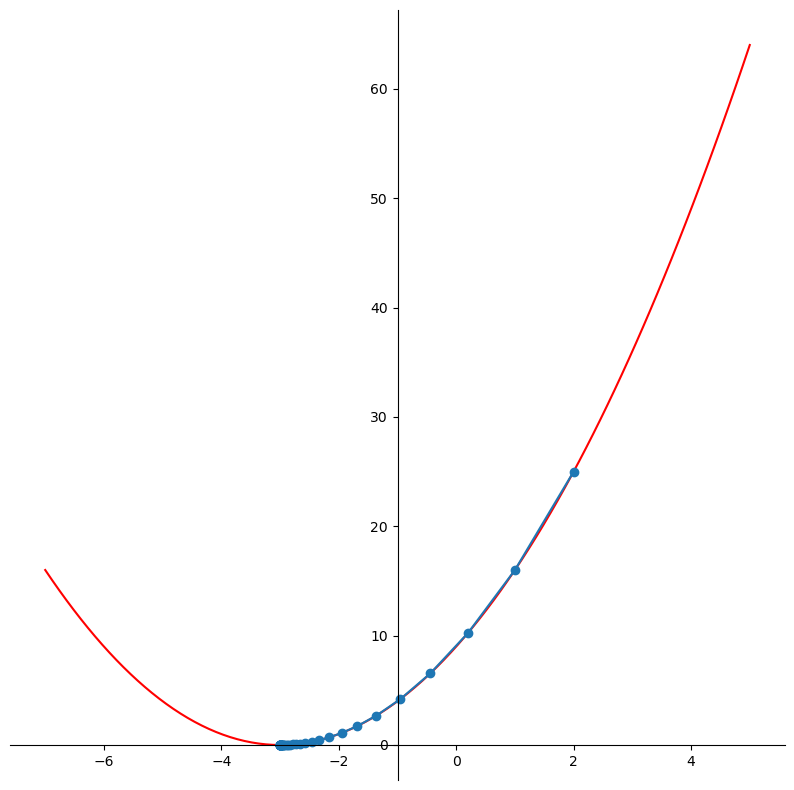

In [2]:
from sympy import Symbol, lambdify
import matplotlib.pyplot as plt
import numpy as np

# Define the symbol for x
x = Symbol('x')

# Define the function y = (x + 3)²
function = (x + 3)**2

def gradient_descent(function, start, learn_rate, n_iter=10000, tolerance=1e-06, step_size=1):
    # Gradient of the function with respect to x
    gradient = lambdify(x, function.diff(x), "numpy")
    function_lambdified = lambdify(x, function, "numpy")
    
    points = [start]
    iters = 0  # iteration counter
    
    while step_size > tolerance and iters < n_iter:
        prev_x = start  # Store current x value in prev_x
        start = start - learn_rate * gradient(prev_x)  # Gradient descent step
        step_size = abs(start - prev_x)  # Change in x
        iters += 1  # Increment iteration count
        points.append(start)
    
    print("The local minimum occurs at", start)
    print(f"Number of iterations: {iters}")
    
    # Create plotting array
    x_ = np.linspace(-7, 5, 100)
    y = function_lambdified(x_)  # Convert the function to a callable for plotting

    # Setting the axes at the center
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Plot the function and the points
    plt.plot(x_, y, 'r')
    plt.plot(points, function_lambdified(np.array(points)), '-o')

    # Show the plot
    plt.show()

# Call the gradient descent function with a starting point of 2.0
gradient_descent(function=function, start=2.0, learn_rate=0.1, n_iter=50)
